<a href="https://colab.research.google.com/github/PranavSingh31/Cat-vs-Dog-Classifier/blob/main/DagvsCatClassificationUsingDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [22]:
!chmod 600 /content/kaggle.json

Importing dogs-vs-cat.zip from Kaggle using Kaggle API

In [24]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:04<00:00, 193MB/s]
100% 812M/812M [00:04<00:00, 203MB/s]


In [27]:
#extracting the compressed dataset file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset) as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [28]:
#extracting the compressed dataset file
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset) as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [29]:
#extracting the compressed dataset file
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset) as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [44]:
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files);
print('Number of images: ', file_count)

Number of images:  25000


In [45]:
#counting the number of files in test1 folder
path, dirs, files = next(os.walk('/content/test1'))
file_count = len(files);
print('Number of images: ', file_count)

Number of images:  12500


In [46]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print('Number of cats : ',cat_count)
print('Number of dogs : ',dog_count)

Number of cats :  12500
Number of dogs :  12500


Printing the name of images

In [42]:
train_file_names = os.listdir('/content/train/')
print(train_file_names)

['dog.6121.jpg', 'cat.1193.jpg', 'cat.6918.jpg', 'dog.6045.jpg', 'cat.1528.jpg', 'cat.3339.jpg', 'cat.2556.jpg', 'dog.11559.jpg', 'dog.6775.jpg', 'dog.1138.jpg', 'dog.1499.jpg', 'dog.11052.jpg', 'dog.3260.jpg', 'dog.5586.jpg', 'dog.7192.jpg', 'cat.8877.jpg', 'cat.6726.jpg', 'cat.11233.jpg', 'cat.11797.jpg', 'dog.11875.jpg', 'cat.7491.jpg', 'cat.9344.jpg', 'dog.11759.jpg', 'dog.5147.jpg', 'dog.7612.jpg', 'cat.11181.jpg', 'dog.2668.jpg', 'cat.2247.jpg', 'dog.9981.jpg', 'cat.11073.jpg', 'dog.7935.jpg', 'dog.7272.jpg', 'dog.6671.jpg', 'dog.11877.jpg', 'dog.260.jpg', 'cat.6044.jpg', 'dog.11239.jpg', 'cat.10581.jpg', 'dog.3529.jpg', 'dog.11348.jpg', 'cat.366.jpg', 'dog.4328.jpg', 'cat.11868.jpg', 'cat.1785.jpg', 'dog.11167.jpg', 'dog.7626.jpg', 'dog.1544.jpg', 'cat.6564.jpg', 'dog.11820.jpg', 'cat.12191.jpg', 'cat.10119.jpg', 'dog.4557.jpg', 'cat.4129.jpg', 'dog.11896.jpg', 'cat.4019.jpg', 'dog.5237.jpg', 'dog.3298.jpg', 'dog.4727.jpg', 'cat.4666.jpg', 'dog.12157.jpg', 'cat.648.jpg', 'dog.10

In [43]:
test_file_names = os.listdir('/content/test1/')
print(test_file_names)

['1182.jpg', '10729.jpg', '5301.jpg', '5421.jpg', '10811.jpg', '406.jpg', '6726.jpg', '6448.jpg', '8379.jpg', '5684.jpg', '4440.jpg', '544.jpg', '8348.jpg', '7881.jpg', '853.jpg', '10308.jpg', '521.jpg', '11847.jpg', '5619.jpg', '10105.jpg', '6322.jpg', '1158.jpg', '6432.jpg', '9720.jpg', '366.jpg', '6075.jpg', '2131.jpg', '5832.jpg', '1378.jpg', '9594.jpg', '10133.jpg', '10215.jpg', '2716.jpg', '83.jpg', '1866.jpg', '12100.jpg', '2175.jpg', '4770.jpg', '3018.jpg', '7116.jpg', '6068.jpg', '4745.jpg', '6207.jpg', '2028.jpg', '111.jpg', '10043.jpg', '10795.jpg', '753.jpg', '814.jpg', '4609.jpg', '1382.jpg', '10792.jpg', '8024.jpg', '6163.jpg', '6500.jpg', '4498.jpg', '1676.jpg', '2149.jpg', '3973.jpg', '9647.jpg', '10733.jpg', '6680.jpg', '9615.jpg', '7422.jpg', '11742.jpg', '7034.jpg', '8937.jpg', '3787.jpg', '3246.jpg', '4503.jpg', '1582.jpg', '12450.jpg', '4633.jpg', '12090.jpg', '6094.jpg', '2623.jpg', '541.jpg', '7756.jpg', '6976.jpg', '2627.jpg', '4352.jpg', '2727.jpg', '11832.jpg'

Importing the dependencies

In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow #to display image in a window

Displaying the images of dogs and cats

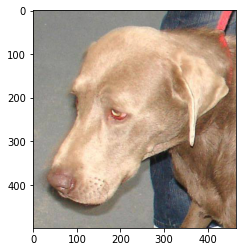

In [54]:
#displa dog image
img  = mpimg.imread('/content/train/dog.6121.jpg')
plt.imshow(img)

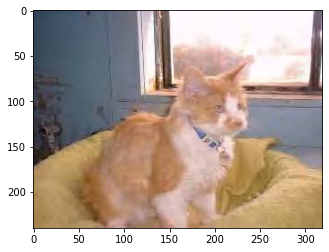

In [40]:
#display cat image
img  = mpimg.imread('/content/train/cat.1193.jpg')
plt.imshow(img)

Resizing all the images

In [49]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [53]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_img_path = resized_folder + filename
  img.save(new_img_path)

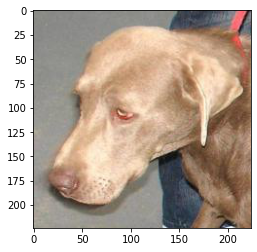

In [55]:
#display resized dog image
img  = mpimg.imread('/content/image resized/dog.6121.jpg')
plt.imshow(img)

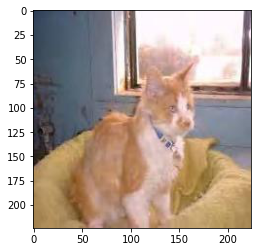

In [56]:
#display resized cat image
img  = mpimg.imread('/content/image resized/cat.1193.jpg')
plt.imshow(img)

**Creating labels for resized images of dogs and cat**

0 for cat and 1 for dog

In [62]:
filenames = os.listdir('/content/image resized')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label =='dog':
    labels.append(1)
  else:
    labels.append(0)

print(labels)

[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 

In [63]:
print(filenames[0:5])
print(labels[0:5])
print(len(filenames));
print(len(labels));

['dog.6121.jpg', 'cat.1193.jpg', 'cat.6918.jpg', 'dog.6045.jpg', 'cat.1528.jpg']
[1, 0, 0, 1, 0]
2000
2000


In [65]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1025  975]


**Converting all the resized images to numpy arrays**

In [68]:
import cv2
import glob

In [71]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [72]:
print(dog_cat_images)

[[[[133 138 137]
   [133 138 137]
   [133 138 137]
   ...
   [ 20  14  39]
   [ 51  41  58]
   [ 76  66  78]]

  [[133 138 137]
   [133 138 137]
   [133 138 137]
   ...
   [ 33  27  52]
   [ 72  62  78]
   [ 97  88  98]]

  [[133 138 137]
   [133 138 137]
   [133 138 137]
   ...
   [ 55  50  71]
   [ 99  90 103]
   [126 115 123]]

  ...

  [[146 158 160]
   [150 162 164]
   [150 162 164]
   ...
   [ 86 113 150]
   [ 79 105 142]
   [ 70  96 133]]

  [[146 158 158]
   [150 162 162]
   [151 163 163]
   ...
   [ 84 110 150]
   [ 83 108 148]
   [ 78 103 143]]

  [[140 152 152]
   [145 157 157]
   [148 160 160]
   ...
   [ 83 108 150]
   [ 82 107 147]
   [ 79 104 144]]]


 [[[ 84  61  45]
   [ 84  61  45]
   [ 85  62  46]
   ...
   [128 112 123]
   [133 117 128]
   [122 106 117]]

  [[ 84  61  45]
   [ 84  61  45]
   [ 85  62  46]
   ...
   [126 110 121]
   [131 115 126]
   [122 106 117]]

  [[ 84  61  45]
   [ 85  62  46]
   [ 86  63  47]
   ...
   [123 106 119]
   [129 112 125]
   [123 106

In [73]:
type(dog_cat_images)

numpy.ndarray

In [75]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [76]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [78]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [81]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train_scaled)
print(X_test_scaled)

[[[[0.16470588 0.14117647 0.05098039]
   [0.21568627 0.19215686 0.10196078]
   [0.23529412 0.21176471 0.12156863]
   ...
   [0.57647059 0.52156863 0.44705882]
   [0.56470588 0.50980392 0.43529412]
   [0.55686275 0.50196078 0.42745098]]

  [[0.26666667 0.23921569 0.16078431]
   [0.24705882 0.21960784 0.14117647]
   [0.25098039 0.22352941 0.14509804]
   ...
   [0.58431373 0.52941176 0.45490196]
   [0.57647059 0.52156863 0.44705882]
   [0.56470588 0.50980392 0.43529412]]

  [[0.37647059 0.35294118 0.27843137]
   [0.28627451 0.2627451  0.18823529]
   [0.2745098  0.25098039 0.17647059]
   ...
   [0.59607843 0.54117647 0.46666667]
   [0.58431373 0.52941176 0.45490196]
   [0.57254902 0.51764706 0.44313725]]

  ...

  [[0.05882353 0.02745098 0.18823529]
   [0.04705882 0.03137255 0.19607843]
   [0.03137255 0.03137255 0.21960784]
   ...
   [0.22745098 0.18823529 0.11764706]
   [0.20784314 0.15294118 0.07843137]
   [0.18431373 0.12941176 0.04313725]]

  [[0.0627451  0.00784314 0.19607843]
   [0.0

**Building the Neural Network**

In [82]:
import tensorflow as tf
import tensorflow_hub as hub

In [83]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [87]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [91]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [93]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 53s 982ms/step - loss: 0.1928 - acc: 0.9187
Epoch 2/5
50/50 [==============================] - 50s 1s/step - loss: 0.0633 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 59s 1s/step - loss: 0.0487 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 55s 1s/step - loss: 0.0380 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 52s 1s/step - loss: 0.0316 - acc: 0.9919


In [94]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accurary =', acc)

13/13 [==============================] - 12s 896ms/step - loss: 0.0512 - acc: 0.9825
Test Loss = 0.051151636987924576
Test Accurary = 0.9825000166893005


**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predictive: ')
input_image = cv2.imread(input_image_path)